# Sprint９　深層学習スクラッチ　ニューラルネットワーク

In [1]:
import numpy as np
import random
import pandas as pd
from numpy import linalg as LA
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split # testとtrain分割

In [2]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Using TensorFlow backend.


### データセットの確認

In [3]:
print("X_train{}".format(X_train.shape)) # (60000, 28, 28)
print("X_test{}".format(X_test.shape)) # (10000, 28, 28)
print("y_train{}".format(y_train.shape))# (60000,)
print("y_test{}".format(y_test.shape))#(10000, )
print(X_train[0].dtype) # uint8
print(X_train[0])

X_train(60000, 28, 28)
X_test(10000, 28, 28)
y_train(60000,)
y_test(10000,)
uint8
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0

### 平滑化

In [4]:
# (1, 28, 28)の各画像を、(1, 784)に変換
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

### 画像データの可視化

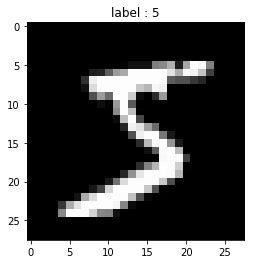

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
index = 0
image = X_train[index].reshape(28,28)
# X_train[index]: (784,)
# image: (28, 28)
plt.imshow(image, 'gray')
plt.title('label : {}'.format(y_train[index]))
plt.show()

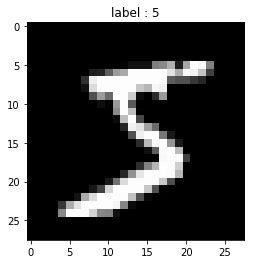

[[-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -1

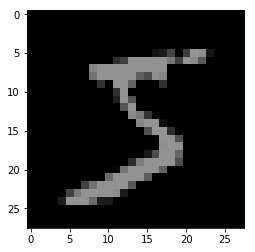

In [6]:
index = 0
image = X_train[index].reshape(28,28)
image = image.astype(np.float) # float型に変換
image -= 105.35 # 意図的に負の小数値を作り出してみる
plt.imshow(image, 'gray')
plt.title('label : {}'.format(y_train[index]))
plt.show()
print(image) # 値を確認
plt.imshow(image, 'gray', vmin = 0, vmax = 255)

## 前処理
画像は0から255のuint8型で表されますが、機械学習をする上では0から1のfloat型で扱うことになります。以下のコードで変換可能です。

In [7]:
X_train = X_train.astype(np.float)
X_test = X_test.astype(np.float)
X_train /= 255 # 全て２５５で割っている
X_test /= 255
print(X_train.max()) # 1.0
print(X_train.min()) # 0.0

1.0
0.0


In [8]:
# one-hot表現

from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
y_train_one_hot = enc.fit_transform(y_train[:, np.newaxis])
y_test_one_hot = enc.transform(y_test[:, np.newaxis])
print(y_train.shape) # (60000,)
print(y_train_one_hot.shape) # (60000, 10)
print(y_train_one_hot.dtype) # float64

(60000,)
(60000, 10)
float64


さらに、訓練用データ6万枚の内2割を検証用データとして分割してください。訓練用データが48000枚、検証用データが12000枚となります。

In [9]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)
print(X_train.shape) # (48000, 784)
print(X_val.shape) # (12000, 784)
print(y_train.shape)
print(y_val.shape)

(48000, 784)
(12000, 784)
(48000,)
(12000,)


### ミニバッチ処理

これまでの機械学習スクラッチでは、全てのサンプルを一度に計算していました。しかし、ニューラルネットワークではデータを分割して入力する 確率的勾配降下法 が一般的です。分割した際のひとかたまりを ミニバッチ 、そのサンプル数を バッチサイズ と呼びます。

今回はバッチサイズを20とします。今回使う訓練用データは48000枚ですから、48000÷20で2400回の更新を繰り返すことになります。ニューラルネットワークではこれを2400回 イテレーション（iteration） すると呼びます。訓練用データを一度全て見ると1回の エポック（epoch） が終わったことになります。このエポックを複数回繰り返し、学習が完了します。

これを実現するための簡素なイテレータを用意しました。for文で呼び出すと、ミニバッチを取得できます。

In [10]:
class GetMiniBatch:
    """
    ミニバッチを取得するイテレータ

    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
      訓練用データ
    y : 次の形のndarray, shape (n_samples, 1)
      正解値
    batch_size : int
      バッチサイズ
    seed : int
      NumPyの乱数のシード
    """
    def __init__(self, X, y, batch_size = 20, seed=0):
        self.batch_size = batch_size
        np.random.seed(seed)
        shuffle_index = np.random.permutation(np.arange(X.shape[0]))
        self._X = X[shuffle_index]
        self._y = y[shuffle_index]
        self._stop = np.ceil(X.shape[0]/self.batch_size).astype(np.int)

    def __len__(self):
        return self._stop

    def __getitem__(self,item):
        p0 = item*self.batch_size
        p1 = item*self.batch_size + self.batch_size
        return self._X[p0:p1], self._y[p0:p1]        

    def __iter__(self):
        self._counter = 0
        return self

    def __next__(self):
        if self._counter >= self._stop:
            raise StopIteration()
        p0 = self._counter*self.batch_size
        p1 = self._counter*self.batch_size + self.batch_size
        self._counter += 1
        return self._X[p0:p1], self._y[p0:p1]


In [11]:
get_mini_batch = GetMiniBatch(X_train, y_train, batch_size=20)

print(len(get_mini_batch)) # 2400
print(get_mini_batch[5]) # 5番目のミニバッチが取得できる

for mini_X_train, mini_y_train in get_mini_batch:
    # このfor文内でミニバッチが使える
    print(mini_y_train.shape)

2400
(array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]), array([8, 9, 6, 6, 1, 8, 4, 2, 9, 0, 7, 0, 1, 6, 1, 9, 6, 9, 3, 6],
      dtype=uint8))
(20,)
(20,)
(20,)
(20,)
(20,)
(20,)
(20,)
(20,)
(20,)
(20,)
(20,)
(20,)
(20,)
(20,)
(20,)
(20,)
(20,)
(20,)
(20,)
(20,)
(20,)
(20,)
(20,)
(20,)
(20,)
(20,)
(20,)
(20,)
(20,)
(20,)
(20,)
(20,)
(20,)
(20,)
(20,)
(20,)
(20,)
(20,)
(20,)
(20,)
(20,)
(20,)
(20,)
(20,)
(20,)
(20,)
(20,)
(20,)
(20,)
(20,)
(20,)
(20,)
(20,)
(20,)
(20,)
(20,)
(20,)
(20,)
(20,)
(20,)
(20,)
(20,)
(20,)
(20,)
(20,)
(20,)
(20,)
(20,)
(20,)
(20,)
(20,)
(20,)
(20,)
(20,)
(20,)
(20,)
(20,)
(20,)
(20,)
(20,)
(20,)
(20,)
(20,)
(20,)
(20,)
(20,)
(20,)
(20,)
(20,)
(20,)
(20,)
(20,)
(20,)
(20,)
(20,)
(20,)
(20,)
(20,)
(20,)
(20,)
(20,)
(20,)
(20,)
(20,)
(20,)
(20,)
(20,)
(20,)
(20,)
(20,)
(20,

### 学習
ニューラルネットワークの学習はフォワードプロパゲーションとバックプロパゲションの繰り返しになります。

### 【問題1】重みの初期値を決めるコードの作成
ニューラルネットワークの各層の重みの初期値を決めるコードを作成してください。

重みの初期値は様々な方法が提案されていますが、今回はガウス分布による単純な初期化を行います。バイアスに関しても同様です。

以下のコードを参考にしてください。標準偏差の値sigmaはハイパーパラメータです。発展的な重みの初期化方法については次のSprintで扱います

In [12]:
n_features = 784
n_nodes1 = 400
n_nodes2 = 200 # 2層目のノード数
sigma = 0.01 # ガウス分布の標準偏差
n_output = 10 # 出力のクラス数（3層目のノード数）
W1 = sigma * np.random.randn(n_features, n_nodes1)# (784, 400)
W2 = sigma * np.random.randn(n_nodes1, n_nodes2) # (400, 200)
W3 = sigma * np.random.randn(n_nodes2, n_output) #(200, 10)
# W1: (784, 400)


In [13]:
print(W1)

[[ 0.00792546 -0.00145092 -0.01287133 ... -0.00245453 -0.03460641
   0.00758269]
 [-0.00137276  0.00278289  0.00932826 ... -0.01495581  0.00968798
   0.0101332 ]
 [-0.00746748  0.00905245  0.0006038  ...  0.01249155 -0.00529285
   0.00730488]
 ...
 [-0.00811823  0.01002275 -0.00182602 ...  0.00378093  0.02126478
  -0.01424466]
 [-0.00437306 -0.00940798 -0.00387237 ... -0.01876301  0.00512501
  -0.00062903]
 [ 0.00909606  0.00415442 -0.00521814 ...  0.01918723 -0.00667915
   0.00316757]]


### 【問題2】フォワードプロパゲーションの実装
三層のニューラルネットワークの フォワードプロパゲーション を作成してください。以下の説明ではノード数は1層目は400、2層目は200としますが、変更しても構いません。

各層の数式を以下に示します。今回はそれぞれの記号が表す配列が、実装上どのようなndarrayのshapeになるかを併記してあります。

In [14]:
batch_size = 20 # バッチサイズ
n_features = 784 # 特徴量の数
n_nodes1 = 400 # 1層目のノード数
n_nodes2 = 200 # 2層目のノード数
n_output = 10 # 出力のクラス数（3層目のノード数）

In [55]:
class ScratchSimpleNeuralNetrowkClassifier():
    """
    シンプルな三層ニューラルネットワーク分類器

    Parameters
    ----------

    Attributes
    ----------
    """

    def __init__(self, category = "tahn", α = 0.001, verbose = True):
        self.verbose = verbose
        #self
        self.batch_size = 20 # バッチサイズ
        self.n_features = 784 # 特徴量の数
        self.n_nodes1 = 400 # 1層目のノード数
        self.n_nodes2 = 200 # 2層目のノード数
        self.n_output = 10 # 出力のクラス数（3層目のノード数） 
        self.category = category
        self.α = α
    
        # W(重み)の初期値を用意
        sigma = 0.01 # ガウス分布の標準偏差
        self.W1 = sigma * np.random.randn(n_features, n_nodes1)# (784, 400)
        self.W2 = sigma * np.random.randn(n_nodes1, n_nodes2) # (400, 200)
        self.W3 = sigma * np.random.randn(n_nodes2, n_output) #(200, 10)

        # B(バイアス)の形を用意
        self.B1 = np.zeros(self.n_nodes1) #(400, )
        self.B2 = np.zeros(self.n_nodes2) #(400, )
        self.B3 = np.zeros(self.n_output) #(10, )
    
    
    # 活性化関数（シグモイド関数・ハイパボリックタンジェント関数）
    def _activation_function(self, A):
        if self.category == sigmoid:
            return 1/ (1+np.exp(-A))
        if self.category == tanh:
            return np.tahn(A)
    
    #ソフトマックス関数で確率ベクトルを求める関数((784, 20)バッチサイズ分２０個)
    def _softmax(self, A):
        #入力値の中で最大値を取得
        c = np.max(A)
        #オーバーフロー対策として、最大値cを引くことで値が小さくなる
        exp_A = np.exp(A - c)
        sum_exp_A = np.sum(exp_A)
        Z = exp_A / sum_exp_A
        #reshape必要？
        return Z

    #交差エントロピー関数(仮に作った予測値と正解の差を出す)  
    def _cross_entropy(self, y):
        L = np.mean(np.sum(y*self.Z3)) #　問７で使う　fit,predictでは使わない
    
    def _forward(self, X):
        """ フォワードプロパゲーションのステップを計算　"""

        #１層目
        self.A1 = X@self.W1 + self.B1#(20,400)

        #１層目の活性化関数(tahn関数)
        self.Z1 = np.tanh(self.A1) #(20,400 A1と同じshape)

        #２層目
        self.A2 = self.Z1@self.W2 + self.B2 # (20, 200)

        # 2層目の活性化関数
        self.Z2 = np.tanh(self.A2)#(20, 200)

        # 3層目
        self.A3 = self.Z2@self.W3 + self.B3#(20, 10)

        # 3層目の活性化関数
        self.Z3 = self._softmax(self.A3)#(20,10)
        
    def _Backpropagation(self, X, y):
        """ バックプロパゲーションのステップを計算　"""
    
        # ３層目

        #W３の更新式(tahn関数を使用)
        gradientLA3 = self.Z3 - y[:, np.newaxis]
        gradientLB3 = np.sum(gradientLA3, axis=0)
        gradientLW3 = self.Z2.T@gradientLA3 #shapeから、ここはドット積
        gradientLZ2 = gradientLA3@(self.W3.T)
        self.W3 = self.W3 - gradientLW3*self.α
        
        # B3の更新式
        self.B3 = self.B3 - gradientLB3*self.α
        
        # 2層目
        
        # W2の更新式
        gradientLA2 = gradientLZ2*(1 - np.tanh(self.A2)**2)
        gradientLB2 = sum(gradientLA2)
        gradientLW2 = (self.Z1.T)@gradientLA2
        gradientLZ1 = gradientLA2@self.W2.T
        self.W2 =  self.W2 - gradientLW2*self.α
        
        # B2の更新式
        self.B2 = self.B2 - gradientLB2*self.α
        
        #１層目
        
        # W1の更新式
        gradientLA1 = gradientLZ1*(1 - np.tanh(self.A1)**2)
        gradientLB1 = sum(gradientLA1)
        gradientLW1 = (X.T)@gradientLA1
        self.W1 = self.W1 - gradientLW1*self.α
        
        # B1の更新式
        self.B1 = self.B1 - gradientLB1*self.α 
    

    def fit(self, X, y, X_val=None, y_val=None):
        """
        ニューラルネットワーク分類器を学習する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練用データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練用データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証用データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証用データの正解値
        """
        
        # ミニバッチ２０枚を取得
        get_mini_batch = GetMiniBatch(X, y, batch_size=20)
        
        self.fit_Z3 = np.empty((self.batch_size, self.n_output))
        for mini_X_train, mini_y_train in get_mini_batch:
            self._forward(mini_X_train)
            self._Backpropagation(mini_X_train, mini_y_train)
            self.fit_Z3 = np.append(self.fit_Z3, self.Z3, axis=0)
            
            
        self.fit_Z3 = self.fit_Z3[20:, :] #１行目のみカット   
        #return self.Z3
        
        #if self.verbose:
            #verboseをTrueにした際は学習過程などを出力する
            #print()

    def predict(self, X):
        """
        ニューラルネットワーク分類器を使い推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            推定結果
        """

        # fitさせたフォワードプロパゲーションのZ3(20, 10)で、画像の数字を予測 
        print(self.fit_Z3.shape)
        predict = np.argmax(self.fit_Z3, axis=1) #(60000, 1)

        return predict

In [56]:
NNC = ScratchSimpleNeuralNetrowkClassifier()
NNC.fit(X_train, y_train)
pred = NNC.predict(X_val)

(48000, 10)


In [57]:
print(pred)

[2 4 4 ... 2 2 2]
